In [98]:
#import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

In [99]:
#importing a data file from prject folder
measure_data = pd.read_csv("M:\Machine Learning Start with CIT\GitHub Projects Machine Learning Algorithm\Data files\data.csv")

In [100]:
measure_data.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


# Data Clean

In [101]:
measure_data = measure_data.rename(columns={'x':'height', 'y':'weight'})

In [102]:
measure_data.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [103]:
measure_data.shape

(99, 2)

In [104]:
measure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  99 non-null     float64
 1   weight  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [105]:
measure_data.describe()

,height,weight
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


In [106]:
measure_data.duplicated().sum()

np.int64(0)

In [107]:
measure_data.isna().sum()

height    0
weight    0
dtype: int64

# vizualization

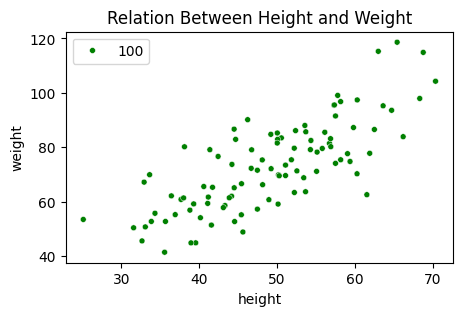

In [108]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=measure_data,
                x='height',
                y='weight',
                color='green',
                size=100)
plt.title('Relation Between Height and Weight')
plt.show()

In [109]:
measure_data.corr()

,height,weight
height,1.000000,0.766264
weight,0.766264,1.000000


<Axes: >

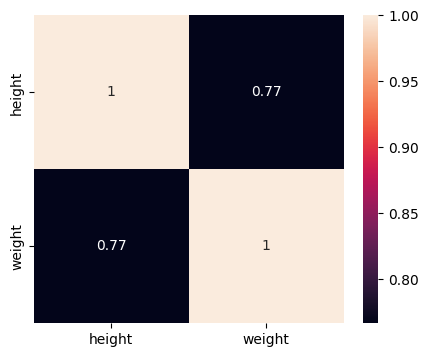

In [110]:
plt.figure(figsize=(5,4))
sns.heatmap(measure_data.corr(), annot=True)

In [111]:
measure_data.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [112]:
#data separation
x = measure_data[['height']]
y = measure_data[['weight']]

In [113]:
# Split the data 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.1, random_state=42)

In [114]:
xtrain.head()

,height
31,42.436477
76,36.930077
47,33.864215
26,63.615561
44,32.669044


In [115]:
ytrain.head()

,weight
31,76.617341
76,55.231661
47,52.725494
26,95.229366
44,45.570589


In [116]:
xtest.head()

,height
62,50.135485
40,43.318283
95,49.239765
18,48.105042
97,48.149859


In [117]:
ytest.head()

,weight
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958


In [118]:
#model implementation
lr = LinearRegression()

In [119]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [120]:
# train the model
model = lr.fit(xtrain,ytrain)

In [121]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
# check the score
model.score(xtrain, ytrain)

0.5910406918480579

In [123]:
# test the model
model.score(xtest, ytest)

0.2655300718247442

In [124]:
#prediction generate
pred_y = model.predict(xtest)
pred_y

array([[75.0691538 ],
       [66.46560094],
       [73.93872307],
       [72.5066614 ],
       [72.5632223 ],
       [80.30261767],
       [61.71986565],
       [67.1626611 ],
       [80.39008453],
       [73.58046047]])

In [125]:
xtest.shape, ytest.shape, pred_y.shape

((10, 1), (10, 1), (10, 1))